In [1]:
%pylab inline
# this installs the pandas library and creates a shorthand for it
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# read all the complaints from the CSV file and store it in the complaints variable
path = 'Civilian_Complaints.csv'
# complaints is a DataFrame
complaints = pd.read_csv(path)

In [3]:
# see the first 10 complaints from the data set
complaints[0:10]

,Extract Run Date,Randomized Id,Closed Year,Case Type,Days From Received Date To Case Closing,Re-opened,Ever On DA Hold,Outcome Path,Case Disposition,Borough Of Incident,Patrol Borough Of Incident,"Stop, Question, Frisk Complaint"
0,05/25/2018,1,2000,CCRB,80,False,False,Truncated,Complainant Uncooperative,Brooklyn,Brooklyn North,False
1,05/25/2018,2,2000,CCRB,391,False,False,Full Investigation,Unsubstantiated,Manhattan,Manhattan South,True
2,05/25/2018,3,2000,CCRB,193,False,False,Mediated,Mediated,Bronx,Bronx,False
3,05/25/2018,4,2000,CCRB,412,False,False,Full Investigation,Unfounded,Manhattan,Manhattan North,False
4,05/25/2018,5,2000,CCRB,394,False,False,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn South,False
5,05/25/2018,6,2000,CCRB,498,False,False,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn South,False
6,05/25/2018,7,2000,CCRB,363,False,False,Full Investigation,Officer(s) Unidentified,Manhattan,Manhattan North,False
7,05/25/2018,8,2000,CCRB,119,False,False,Truncated,Complainant Uncooperative,Queens,Queens South,True
8,05/25/2018,9,2000,CCRB,459,False,False,Full Investigation,Exonerated,Brooklyn,Brooklyn North,True
9,05/25/2018,10,2000,CCRB,228,False,False,Full Investigation,Officer(s) Unidentified,Brooklyn,Brooklyn North,False


In [17]:
# This creates a sub data set of all complaints invovling stop and frisk
stop_and_frisk = complaints[[x for x in complaints['Stop, Question, Frisk Complaint']]]

In [19]:
# let's us see the subset (it will show us the first 5 and last 5)
stop_and_frisk

,Extract Run Date,Randomized Id,Closed Year,Case Type,Days From Received Date To Case Closing,Re-opened,Ever On DA Hold,Outcome Path,Case Disposition,Borough Of Incident,Patrol Borough Of Incident,"Stop, Question, Frisk Complaint"
1,05/25/2018,2,2000,CCRB,391,False,False,Full Investigation,Unsubstantiated,Manhattan,Manhattan South,True
7,05/25/2018,8,2000,CCRB,119,False,False,Truncated,Complainant Uncooperative,Queens,Queens South,True
8,05/25/2018,9,2000,CCRB,459,False,False,Full Investigation,Exonerated,Brooklyn,Brooklyn North,True
11,05/25/2018,12,2000,CCRB,403,False,False,Full Investigation,Exonerated,Queens,Queens North,True
15,05/25/2018,16,2000,CCRB,114,False,False,Truncated,Complainant Uncooperative,Queens,Queens South,True
...,...,...,...,...,...,...,...,...,...,...,...,...
104724,05/25/2018,104725,2017,CCRB,27,False,False,Truncated,Complaint Withdrawn,Manhattan,Manhattan North,True
104725,05/25/2018,104726,2017,CCRB,54,False,False,Truncated,Complaint Withdrawn,Brooklyn,Brooklyn South,True
104727,05/25/2018,104728,2017,CCRB,43,False,False,Truncated,Complainant Uncooperative,Bronx,Bronx,True
104728,05/25/2018,104729,2017,CCRB,28,False,False,Truncated,Complainant Uncooperative,Queens,Queens South,True


In [22]:
# gives us the number of stop and frisk complaints in each borough
stop_and_frisk['Borough Of Incident'].value_counts()[:5].sort_values(ascending=False)

Brooklyn         9585
Bronx            6483
Manhattan        5446
Queens           3920
Staten Island    1127
Name: Borough Of Incident, dtype: int64

In [23]:
# gives us the number of cases for each outcomes
stop_and_frisk['Outcome Path'].value_counts()[:10].sort_values(ascending=False)

Truncated              14070
Full Investigation     11489
Mediation Attempted      541
Mediated                 485
Other                     79
Name: Outcome Path, dtype: int64

Text(0.5, 1.0, 'distribution of how long complaints remained opened')

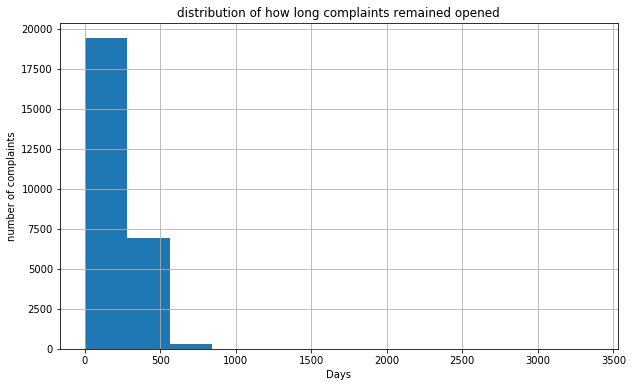

In [36]:
# create a histogram plotting how long cases remained open
stop_and_frisk['Days From Received Date To Case Closing'].hist(bins=12, figsize=(10,6))
xlabel('Days')
ylabel('Number of Complaints')
title('Distribution of How Long Complaints Remained Opened')

In [27]:
# find case opened for the longest amount of time
stop_and_frisk.loc[stop_and_frisk['Days From Received Date To Case Closing'].idxmax()]

Extract Run Date                                   05/25/2018
Randomized Id                                          103653
Closed Year                                              2017
Case Type                                                CCRB
Days From Received Date To Case Closing                  3361
Re-opened                                                True
Ever On DA Hold                                         False
Outcome Path                               Full Investigation
Case Disposition                              Unsubstantiated
Borough Of Incident                             Staten Island
Patrol Borough Of Incident                      Staten Island
Stop, Question, Frisk Complaint                          True
Name: 103653, dtype: object

In [28]:
 # remove the outlier
stop_and_frisk_no_outliers = stop_and_frisk[stop_and_frisk['Days From Received Date To Case Closing'] != 3361]

In [58]:
# see current max value
stop_and_frisk_no_outliers.loc[stop_and_frisk_no_outliers['Days From Received Date To Case Closing'].idxmax()]

Extract Run Date                                   05/25/2018
Randomized Id                                           51583
Closed Year                                              2008
Case Type                                                CCRB
Days From Received Date To Case Closing                  3203
Re-opened                                               False
Ever On DA Hold                                         False
Outcome Path                               Full Investigation
Case Disposition                              Unsubstantiated
Borough Of Incident                                    Queens
Patrol Borough Of Incident                       Queens South
Stop, Question, Frisk Complaint                          True
Name: 51586, dtype: object

In [33]:
outliers = stop_and_frisk[[x for x in stop_and_frisk['Days From Received Date To Case Closing'] > 1000]]

In [34]:
len(outliers)

16

In [35]:
non_outliers = stop_and_frisk[[x for x in stop_and_frisk['Days From Received Date To Case Closing'] < 1000]]

Text(0.5, 1.0, 'distribution of how long complaints remained opened')

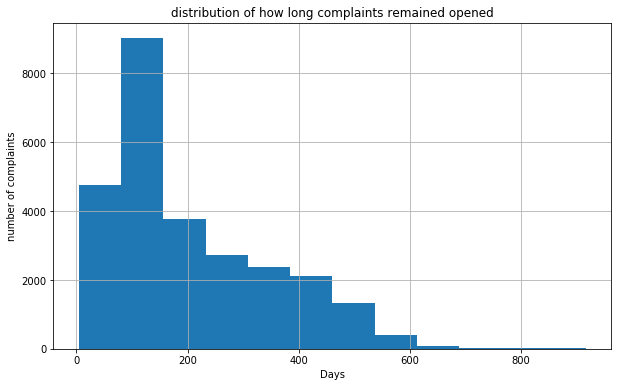

In [38]:
# create a histogram plotting how long cases remained open
non_outliers['Days From Received Date To Case Closing'].hist(bins=12, figsize=(10,6))
xlabel('Days')
ylabel('number of complaints')
title('distribution of how long complaints remained opened')

In [39]:
# how many stop and frisk complaints did the DA put on hold?
da_hold = stop_and_frisk[[x for x in stop_and_frisk['Ever On DA Hold']]]

In [40]:
len(da_hold)

69

In [41]:
da_hold

,Extract Run Date,Randomized Id,Closed Year,Case Type,Days From Received Date To Case Closing,Re-opened,Ever On DA Hold,Outcome Path,Case Disposition,Borough Of Incident,Patrol Borough Of Incident,"Stop, Question, Frisk Complaint"
47939,05/25/2018,47936,2008,CCRB,63,False,True,Truncated,Complainant Uncooperative,Manhattan,Manhattan North,True
48707,05/25/2018,48704,2008,CCRB,450,False,True,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn South,True
50054,05/25/2018,50051,2008,CCRB,102,False,True,Truncated,Complaint Withdrawn,Bronx,Bronx,True
50062,05/25/2018,50059,2008,CCRB,83,False,True,Truncated,Complainant Uncooperative,Manhattan,Manhattan North,True
51106,05/25/2018,51103,2008,CCRB,107,False,True,Truncated,Complaint Withdrawn,Brooklyn,Brooklyn North,True
...,...,...,...,...,...,...,...,...,...,...,...,...
103307,05/25/2018,103307,2017,CCRB,226,False,True,Full Investigation,Substantiated (Charges),Bronx,Bronx,True
103381,05/25/2018,103381,2017,CCRB,167,False,True,Full Investigation,Substantiated (Command Discipline A),Bronx,Bronx,True
103734,05/25/2018,103734,2017,CCRB,203,False,True,Full Investigation,Substantiated (Command Lvl Instructions),Bronx,Bronx,True
103949,05/25/2018,103949,2017,CCRB,274,False,True,Full Investigation,Exonerated,Brooklyn,Brooklyn South,True


In [42]:
# gives us the number of cases for each disposition
stop_and_frisk['Case Disposition'].value_counts()[:10].sort_values(ascending=False)

Complainant Uncooperative       7998
Unsubstantiated                 5218
Complaint Withdrawn             2565
Complainant Unavailable         1723
Exonerated                      1563
Substantiated (Charges)         1442
Alleged Victim Uncooperative    1329
Unfounded                       1318
Officer(s) Unidentified         1020
Mediation Attempted              541
Name: Case Disposition, dtype: int64

In [54]:
substaintiated = stop_and_frisk[stop_and_frisk["Case Disposition"].str.find("Substantiated") != -1]

In [55]:
substaintiated

,Extract Run Date,Randomized Id,Closed Year,Case Type,Days From Received Date To Case Closing,Re-opened,Ever On DA Hold,Outcome Path,Case Disposition,Borough Of Incident,Patrol Borough Of Incident,"Stop, Question, Frisk Complaint"
82,05/25/2018,83,2000,CCRB,144,False,False,Full Investigation,Substantiated (Command Discipline),Queens,Queens North,True
199,05/25/2018,199,2000,CCRB,459,True,False,Full Investigation,Substantiated (Charges),Queens,Queens South,True
247,05/25/2018,247,2000,CCRB,596,False,False,Full Investigation,Substantiated (Command Discipline),Bronx,Bronx,True
408,05/25/2018,408,2000,CCRB,155,False,False,Full Investigation,Substantiated (Instructions),Brooklyn,Brooklyn North,True
428,05/25/2018,428,2000,CCRB,373,False,False,Full Investigation,Substantiated (Charges),Manhattan,Manhattan North,True
...,...,...,...,...,...,...,...,...,...,...,...,...
104674,05/25/2018,104675,2017,CCRB,205,False,False,Full Investigation,Substantiated (Command Discipline B),Manhattan,Manhattan North,True
104679,05/25/2018,104680,2017,CCRB,280,False,False,Full Investigation,Substantiated (Command Discipline B),Brooklyn,Brooklyn North,True
104685,05/25/2018,104686,2017,CCRB,261,False,False,Full Investigation,Substantiated (Command Discipline A),Queens,Queens North,True
104690,05/25/2018,104691,2017,CCRB,147,False,False,Full Investigation,Substantiated (Formalized Training),Bronx,Bronx,True


In [56]:
substaintiated['Case Disposition'].value_counts()[:10].sort_values(ascending=False)

Substantiated (Charges)                     1442
Substantiated (Command Discipline)           356
Substantiated (Formalized Training)          178
Substantiated (Command Discipline A)         143
Substantiated (Instructions)                 103
Substantiated (Command Discipline B)         100
Substantiated (No Recommendations)            33
Substantiated (Command Lvl Instructions)      15
Name: Case Disposition, dtype: int64

In [82]:
years = complaints['Closed Year']

In [83]:
years

0         2000
1         2000
2         2000
3         2000
4         2000
          ... 
104726    2017
104727    2017
104728    2017
104729    2017
104730    2017
Name: Closed Year, Length: 104731, dtype: int64

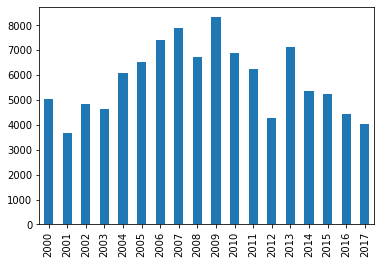

In [87]:
x=years.value_counts()
x=x.sort_index()
x.plot(kind='bar')
plt.show()